In [1]:
import sys
sys.path.append("../")
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_feather("../data/Xtrain.feather")
y_train = pd.read_feather("../data/Ytrain.feather")

In [3]:
df_train.shape

(1024017, 100)

In [4]:
df_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
count,1.024017e+06,1.024017e+06,1.024017e+06,1.024017e+06,1.024017e+06,1.024017e+06,1.024017e+06,1.024017e+06,1.024017e+06,1.024017e+06,...,1.024017e+06,1.024017e+06,1.024017e+06,1.024017e+06,1.024017e+06,1.024017e+06,1.024017e+06,1.024017e+06,1.024017e+06,1.024017e+06
mean,-6.518679e-09,6.672228e-10,-9.532270e-10,4.269878e-09,3.504366e-09,-4.071867e-09,-1.706720e-09,-1.305563e-08,6.917208e-09,-4.598922e-09,...,-5.136601e-09,-2.603816e-09,9.964495e-09,-3.532422e-09,8.126426e-09,7.224812e-11,-5.636381e-09,5.531871e-09,-2.996327e-09,5.558418e-09
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000001e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.384137e+01,-5.348097e+01,-5.359155e+01,-4.345623e+01,-5.565438e+00,-2.726060e+01,-3.434529e+01,-2.577860e+01,-2.586399e+01,-5.117103e+01,...,-9.844311e-01,-1.539398e+00,-2.790656e+00,-5.356011e-01,-1.624940e+00,-2.871340e+00,-1.182640e+00,-5.398743e-01,-9.713732e-01,-2.862006e+00
25%,-2.527577e-01,-4.911268e-01,-4.339013e-01,-4.028400e-01,-6.412429e-01,-5.656964e-01,-5.582917e-01,-6.068162e-01,-6.183879e-01,-6.827538e-01,...,-6.566624e-01,-6.582918e-01,-7.527274e-01,-5.356011e-01,-6.559240e-01,-7.516221e-01,-6.901040e-01,-5.398743e-01,-6.602997e-01,-7.532309e-01
50%,6.644796e-04,-4.800975e-04,-6.816976e-04,1.075684e-05,-1.914048e-02,-3.417354e-04,4.824905e-03,-3.598125e-03,-1.421960e-02,-4.797161e-04,...,-2.635882e-01,-2.666891e-01,-1.264591e-01,-2.160424e-01,-2.210234e-01,-1.021709e-01,-3.876244e-01,-2.347269e-01,-2.735443e-01,-1.397283e-01
75%,2.540866e-01,4.901666e-01,4.325379e-01,3.984346e-01,6.207308e-01,5.624455e-01,5.679415e-01,5.978246e-01,6.201570e-01,6.817943e-01,...,3.364506e-01,3.207151e-01,6.717248e-01,1.035163e-01,3.842347e-01,6.911148e-01,3.386472e-01,7.042053e-02,3.329692e-01,6.474695e-01
max,4.612349e+01,2.404121e+01,2.438798e+01,5.061975e+01,6.534543e+00,2.101052e+01,3.294714e+01,1.982056e+01,1.996864e+01,2.865503e+01,...,2.243259e+01,2.156517e+01,2.631013e+00,8.862127e+01,2.864015e+01,2.436821e+00,1.200949e+01,3.912929e+01,2.514243e+01,2.789294e+00


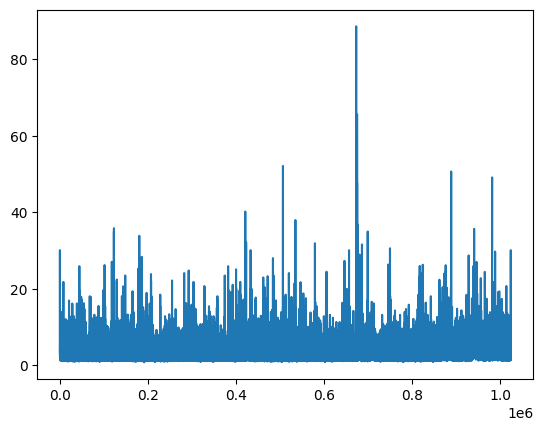

In [12]:
import matplotlib.pyplot as plt
plt.plot(df_train.max(1).values)

In [5]:
y_train.shape

(1024017, 1)

In [6]:
from sklearn.model_selection import KFold

In [7]:
# 假设 X 是一个 (1024017, 100) 维度的数组
n_samples,n_features = df_train.shape
# 计算划分训练集和测试集的索引
n_train_test_split = int(n_samples * 0.8)  # 计算 80% 的位置
# 训练集和测试集的划分
X_train_val = np.arange(n_train_test_split)  # 训练+验证集索引
X_test = np.arange(n_train_test_split, n_samples)  # 测试集索引
# 设置 4 折交叉验证
kf = KFold(n_splits=4,shuffle=False)
# 用于存储训练和验证集的索引
train_val_indices = []

for train_index, val_index in kf.split(X_train_val):
    # 输出每一折的训练集和验证集的索引
    print("TRAIN:", len(train_index), "VAL:", len(val_index))
    train_val_indices.append((train_index, val_index))

TRAIN: 614409 VAL: 204804
TRAIN: 614410 VAL: 204803
TRAIN: 614410 VAL: 204803
TRAIN: 614410 VAL: 204803


array([[<Axes: title={'center': 'y'}>]], dtype=object)

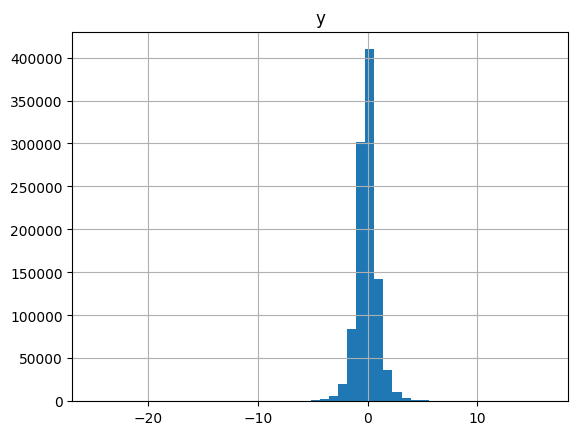

In [8]:
y_train.hist(bins=50)

In [9]:
y_train.describe()

,y
count,1.024017e+06
mean,-3.150730e-03
std,1.000005e+00
min,-2.482270e+01
25%,-4.813266e-01
50%,0.000000e+00
75%,4.813266e-01
max,1.622758e+01
